In [1]:
'This cell imports necessary libraries'
import numpy as np
import pandas as pd
from collections import Counter
filepath = '/home/syshain/Arshad/Lear_India_Remote_Internship/Task2_OEE/HSL1/'

In [2]:
'This cell imports the dataset'
dataset = pd.read_csv(filepath + 'HSL1_Report_modified_for_OEE.csv')
date = dataset['Date']
times = dataset['Time']
result = dataset[' Result']

/home/syshain/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (37,41,42,109,119,222,223,224) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
'This cell calculates the cycle time'
del_time = pd.to_timedelta(times)
time_differences = np.asarray([del_time[i+1]-del_time[i] for i in range(len(del_time)-1)])
max_rep = Counter(time_differences).most_common(4)
'This line finds the most common time difference which can be taken as the ideal time required to produce one set of LH and RH recliners'
cycle_time = (max_rep[1][0]).total_seconds()/4

In [4]:
'This cell calculates all intermediate quantities'
unplanned_dt = time_differences.sum(initial = pd.to_timedelta('00:00:00'), where = (time_differences > pd.to_timedelta('00:01:00')))
no_ok = Counter(result)['OK']
no_ng = Counter(result)['NG']
total_possibility = 24*3600/cycle_time

In [5]:
'This cell calculates all final quantities'
availability = 1 - unplanned_dt/pd.to_timedelta('24:00:00')
quality = no_ok/(no_ok + no_ng)
OEE = no_ok/total_possibility
performance = OEE/(availability*quality)

In [6]:
'This cell prints all the results'
print('The required results from the calculations are as follow:' + '\n' + 'OEE: ' + str(OEE) + '\n'+ 'Availability: ' + str(availability) + '\n' + 'Performance: ' + str(performance) + '\n' + 'Quality: ' + str(quality))

The required results from the calculations are as follow:
OEE: 0.5597193287037037
Availability: 0.7935416666666667
Performance: 0.7198922143461391
Quality: 0.9797902030603407


In [7]:
'This cell prepares the data for calculation of hourly quantities'
timear = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'])
hourly_distribution = []
result_hrly = []
hrly_diff = []
blank = 0
onehr = pd.to_timedelta('1:00:00')
starttime = pd.to_datetime('15-10-2019'+' ' + '7:00:00')


In [8]:
'This cell contains a loop to continue quantity preparation and converts them to appropriate types'
for i in range(17):
    hourly_distribution.append(timear[np.where(timear > starttime+i*(onehr))[0][0]:(np.where(timear > starttime+(i+1)*(onehr))[0][0])-1])
    result_hrly.append(result[np.where(timear > starttime+i*(onehr))[0][0]:(np.where(timear > starttime+(i+1)*(onehr))[0][0])-1])
    hrly_diff.append([hourly_distribution[i][j+1] - hourly_distribution[i][j] for j in range(blank, blank + len(hourly_distribution[i])-1)])
    blank = (np.where(timear > starttime+(i+1)*(onehr))[0][0])


In [9]:
'This cell calculates the most important quantities relating to the final calculations'
hrly_diff = np.array(hrly_diff)
hrly_unplanned = []
for i in range(17):
    hrly_unplanned.append(np.array(hrly_diff[i]).sum(initial = pd.to_timedelta('00:00:00'), where  = (np.array(hrly_diff[i]) > pd.to_timedelta('00:01:00'))))
ok_hrly = np.array([Counter(result_hrly[i])['OK'] for i in range(len(result_hrly))])
ng_hrly = np.array([Counter(result_hrly[i])['NG'] for i in range(len(result_hrly))])
hrly_possibility = total_possibility/24;


In [10]:
'This cell calculates all the final hourly quantities'
availability_hrly = 1 - np.divide(hrly_unplanned,pd.to_timedelta('1:00:00'))
quality_hrly = np.divide(ok_hrly,(ok_hrly + ng_hrly))
OEE_hrly = ok_hrly / hrly_possibility
performance_hrly = OEE_hrly/(availability_hrly*quality_hrly)

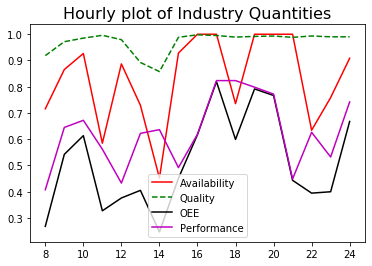

In [11]:
'This cell plots the relevant quantities'
import matplotlib.pyplot as plt
hours = np.arange(8,25,1)
plt.plot(hours, availability_hrly, 'r-')
plt.plot(hours, quality_hrly, 'g--')
plt.plot(hours, OEE_hrly, 'k')
plt.plot(hours, performance_hrly, 'm')
plt.title('Hourly plot of Industry Quantities', fontsize = 16)
plt.legend(('Availability', 'Quality', 'OEE', 'Performance'))
plt.show()

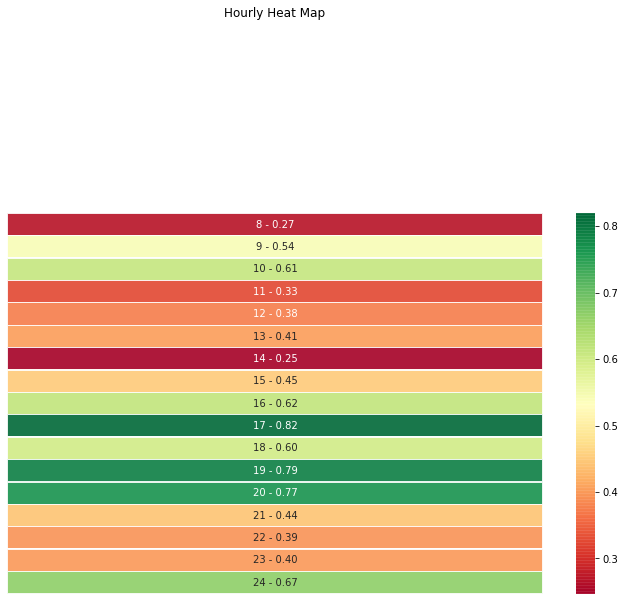

In [12]:
'This cell attempts to plot the heatmap for the hourly data'
import seaborn as sns
fig, ax = plt.subplots(figsize = (12,7))
ax.set_xticks([])
ax.set_yticks([])
plt.title('Hourly Heat Map')
ttl = ax.title
ttl.set_position([0.5, 1.5])
ax.axis('off')
labels = np.asarray(["{0} - {1:.2f}".format(value, symb) for value, symb in zip(hours, OEE_hrly)]).reshape(17,1)
sns.heatmap(OEE_hrly.reshape(17,1), annot = labels, fmt = "" ,cmap = 'RdYlGn', ax =ax, linewidths = 0.3, alpha = 0.9)